# Exploratory Data Analysis on IPL Data

# Importing Libraries

In [15]:
# import libraries 
import pandas as pd
import numpy as np

# import for data visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [16]:
# for inline graphs 
%matplotlib inline     
sns.set_style("white")
# set the default font size
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 5)



# Data Preparation and Cleaning

**Matches**

In [17]:
# read the file using pd.read_csv()
matches = pd.read_csv('/Users/Ankit/Desktop/IPL DAV Project/IPL_Matches_2008-2020.csv')
# first 5 rows 
matches.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [18]:
# check the number of rows and columns in the dataset 
matches.shape


(816, 17)

There are 816 rows and 17 columns. 

In [19]:
# use info() to get additional information about the dataset 
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

The info() function shows the number of non-null values. There are null values present in the dataset. 
Let's check the nan values.

In [20]:
# check for the nan 
match_na = matches.isna().sum()

# show the columns with null values 
match_na[match_na > 0]

city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64

After inspecting the dataset we found that the columns winner, result, player_of_match has 4 nans. We found that the matches that were tied due to rains have nans in these columns. We can drop the nan rows as it will not affect our analysis.

In [21]:
# drop nan values from the rows where the matches were tied due to rain 
matches = matches.dropna(subset = ['winner', 'result', 'player_of_match'])
matches.shape

(812, 17)

The column 'method' has the highest number of NaNs in the dataset. The best course of action would probably be to drop the entire column. However, the rows where the 'method' column does have values are those matches where D/L method was used. Let us store it in another DataFrame and drop 'method' from matches.

In [22]:
# a dataframe that contains all the matches where D/L method was used 
DL = matches.dropna(subset = ['method'])

# drop the method column from the matches dataframe 
matches = matches.drop('method', axis = 1)

In [23]:
# matches with D/L method 
DL.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene


In [24]:
# matches with nan values in the city 
matches[matches['city'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,Aleem Dar,VA Kulkarni


Matches that were held in Dubai International Stadium had NaNs in their city column.

In [25]:
# update the city column to 'Dubai'
matches.loc[matches.city.isna(), 'city'] = 'Dubai'

In [26]:
# check for the nan values 
matches.city.isna().sum()

0

Lets take a look at the 'result_margin' column which has nan values.

In [27]:
# first 5 rows 
matches.loc[matches['result_margin'].isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary


After close inspection, we found that result_margin has nans in matches that were tied.

In [28]:
# replace nan with 0 
matches.loc[matches.result == 'tie', 'result_margin'] = 0

Let's see if all the na values are taken care of...

In [29]:
match_na = matches.isna().sum()
match_na[match_na > 0]

Series([], dtype: int64)

After inspecting the matches dataset, we found that the team 'Rising Pune Supergiant' is written as 'Rising Pune Supergiants'. Also, Delhi Daredevils and Delhi Capitals are the same team. Lets fix this.

In [30]:
# unique teams 
matches.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [31]:
# unique venues 
matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [32]:
# 'M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium' are the same venue
# replace 
matches.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium',inplace=True)

In [33]:
# both are the same team 
matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [34]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [35]:
# The name 'RG Sharma' is 'R Sharma'
matches.replace('RG Sharma','R Sharma', inplace=True)

**Deliveries**

Load another dataset called 'IPL Ball-by-Ball 2008-2020'. The dataset contains ball by ball data. 

In [36]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [37]:
# check the number of rows and columns
deliveries.shape

(193468, 18)

In [38]:
# info() function to show some more information about the dataset 
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [39]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

Let's fix the team names same as Matches.

In [40]:
deliveries.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [41]:
deliveries.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [42]:
# update the name same as matches 
deliveries.replace('RG Sharma','R Sharma',inplace=True)

In [43]:
# check the null values 
deliveries.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [44]:
# when there is any dismissal, the dismissal kind is not nan 
deliveries.loc[deliveries.dismissal_kind.isna() & deliveries.is_wicket==1].head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team


The NaN values in dismissal_kind and player_dismissed can be replaced with 0 or left as they are. These Nan values show that no player was dismissed on that particular ball. 

In [45]:
deliveries.dismissal_kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [46]:
# when a player is bowled, the fielder column has nan values 
deliveries.loc[deliveries.fielder.isna() & ~deliveries.dismissal_kind.isna()].head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
168,335982,2,13,1,Z Khan,P Kumar,SC Ganguly,0,0,0,0,1,bowled,Z Khan,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
210,335982,2,1,1,R Dravid,W Jaffer,I Sharma,0,0,0,0,1,bowled,R Dravid,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
278,335983,1,15,3,JDP Oram,MEK Hussey,IK Pathan,0,0,0,0,1,bowled,JDP Oram,NaN,NaN,Chennai Super Kings,Kings XI Punjab
343,335983,1,6,2,ML Hayden,MEK Hussey,IK Pathan,0,0,0,0,1,bowled,ML Hayden,NaN,NaN,Chennai Super Kings,Kings XI Punjab


when a player is bowled, the fielder column has nan values. 

In [47]:
# check for the nan values in bowling_team
deliveries[deliveries.bowling_team.isna()].head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Capitals,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Capitals,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,NaN


In [48]:
# there are only two games where the bowling_team has nan values 
deliveries.loc[deliveries.bowling_team.isna(),'id'].unique()

array([501265, 829763])

In [49]:
matches[matches['id'].isin([501265, 829763])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2


There are no record of matches with id 501265 and 829763 in the matches dataframe. Therefore they can be left as they are. 

The nan values can be left as they are. There is no need to alter the dataframe. 

## EXPLORATORY DATA ANALYSIS

### **Does winning the toss affect the outcome of a match for a team?**<br>

In [50]:
matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri


In [51]:
# Total matches played by a team
partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = (partial_count1+partial_count2).sort_values(ascending=False)
total_matches

Mumbai Indians                 203
Delhi Capitals                 192
Kolkata Knight Riders          192
Royal Challengers Bangalore    192
Kings XI Punjab                190
Chennai Super Kings            178
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
dtype: int64

In [52]:
# number of matches won by a team 
total_match_wins = matches['winner'].value_counts()
total_match_wins

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [53]:
# number of matches won by a team after winning the toss 
toss_match_wins = matches.loc[(matches['toss_winner'] == matches['winner']), 'toss_winner'].value_counts()
toss_match_wins

Chennai Super Kings            61
Mumbai Indians                 61
Kolkata Knight Riders          55
Delhi Capitals                 45
Rajasthan Royals               44
Royal Challengers Bangalore    43
Kings XI Punjab                36
Sunrisers Hyderabad            29
Deccan Chargers                19
Gujarat Lions                  10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: toss_winner, dtype: int64

Here I just want to see what would be the chances for a certain team to win a match if it wins the toss.


In [54]:
# win percentage of teams after winning the toss 
win_perc_after_toss = (np.divide(toss_match_wins, total_matches)*100).sort_values(ascending=False)
win_perc_after_toss

Chennai Super Kings            34.269663
Gujarat Lions                  33.333333
Mumbai Indians                 30.049261
Kolkata Knight Riders          28.645833
Kochi Tuskers Kerala           28.571429
Rajasthan Royals               27.672956
Rising Pune Supergiant         26.666667
Deccan Chargers                25.333333
Delhi Capitals                 23.437500
Sunrisers Hyderabad            23.387097
Royal Challengers Bangalore    22.395833
Kings XI Punjab                18.947368
Pune Warriors                   6.666667
dtype: float64

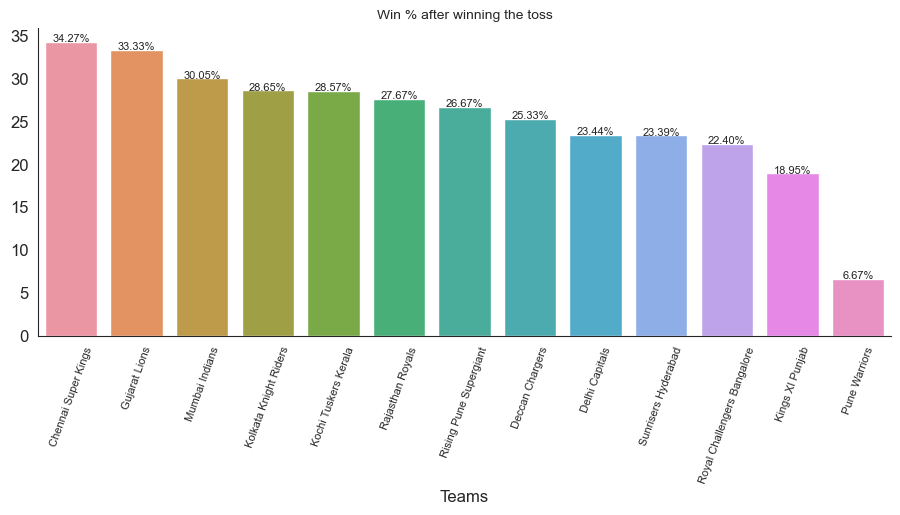

In [55]:
# a barplot to show the percentage of wins after winning the toss 
# set the size 
plt.figure(figsize=(11,4))
sns.barplot(x=win_perc_after_toss.index,
           y=win_perc_after_toss.values
           )
plt.xticks(rotation=70,fontsize=8)
# remove the spine from the graph
sns.despine()
plt.title('Win % after winning the toss',fontsize=10)
plt.xlabel('Teams')

# show percentage above the bar 
for index, value in enumerate(win_perc_after_toss.values):
    plt.text(index, value, "{:.2f}".format(value)+'%',ha='center',fontsize=8)

plt.show()

> *All the percentages are below 50%, hence there isn't any evidence that suggests that winning the toss would increase the chances of winning the match.*

In [56]:
# Won toss but lost match = Total times teams won toss - WON both toss and match 
match_lost_after_toss = matches['toss_winner'].value_counts()- toss_match_wins
match_lost_after_toss

Chennai Super Kings            36
Deccan Chargers                24
Delhi Capitals                 54
Gujarat Lions                   5
Kings XI Punjab                49
Kochi Tuskers Kerala            4
Kolkata Knight Riders          43
Mumbai Indians                 45
Pune Warriors                  17
Rajasthan Royals               41
Rising Pune Supergiant          5
Royal Challengers Bangalore    43
Sunrisers Hyderabad            28
Name: toss_winner, dtype: int64

In [57]:
# create a dataframe that shows the number of wins and loses 
df=pd.DataFrame({'loss':match_lost_after_toss,'wins':toss_match_wins})
df.reset_index(inplace=True)

In [58]:
df.rename(columns={'index':'team'},inplace=True)

In [59]:
df.head()

,team,loss,wins
0,Chennai Super Kings,36,61
1,Deccan Chargers,24,19
2,Delhi Capitals,54,45
3,Gujarat Lions,5,10
4,Kings XI Punjab,49,36


In [60]:
# melt the dataframe 
df_melted = df.melt(id_vars='team', var_name='Win/loss', value_name='Values')

In [61]:
df_melted.head()

,team,Win/loss,Values
0,Chennai Super Kings,loss,36
1,Deccan Chargers,loss,24
2,Delhi Capitals,loss,54
3,Gujarat Lions,loss,5
4,Kings XI Punjab,loss,49


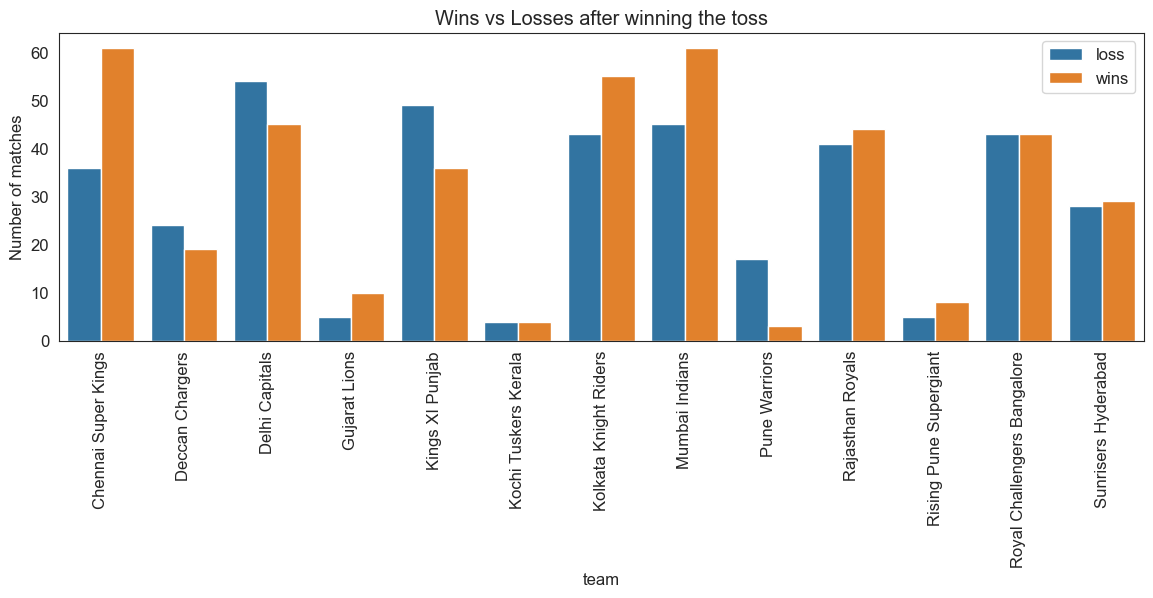

In [62]:
# plot a graph to show the number of wins vs losses after winning the toss
plt.figure(figsize=(14,4))
sns.barplot(x='team',
           y='Values',
           data=df_melted,
           hue='Win/loss')
plt.xticks(rotation=90)
plt.title('Wins vs Losses after winning the toss')
plt.legend()
plt.ylabel('Number of matches')
plt.show()

> *We can see that there are teams that have actually lost more matches than they have won after winning the toss.*

### does choosing batting or bowling first help in winning matches ?

In [141]:
# number of wins based on toss decision
toss_decision=matches[matches['toss_winner']==matches['winner']]['toss_decision'].value_counts()
toss_decision

field    273
bat      145
Name: toss_decision, dtype: int64

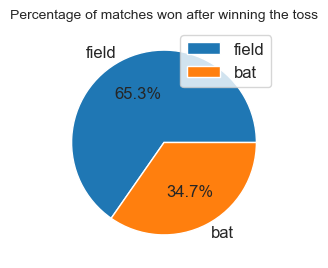

In [64]:
# a piechart to show the percentage of wins after winning the toss
plt.figure(figsize=(4,3))
plt.pie(toss_decision,
        labels=toss_decision.index,
        autopct='%.1f%%')
plt.title('Percentage of matches won after winning the toss', fontsize=10)
plt.legend(loc='upper right')
plt.show()

> 65.3% of matches have been won after electing to field first. 

**Which team has the highest win?**

In [65]:
# total number of wins 
total_match_wins.head()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Name: winner, dtype: int64

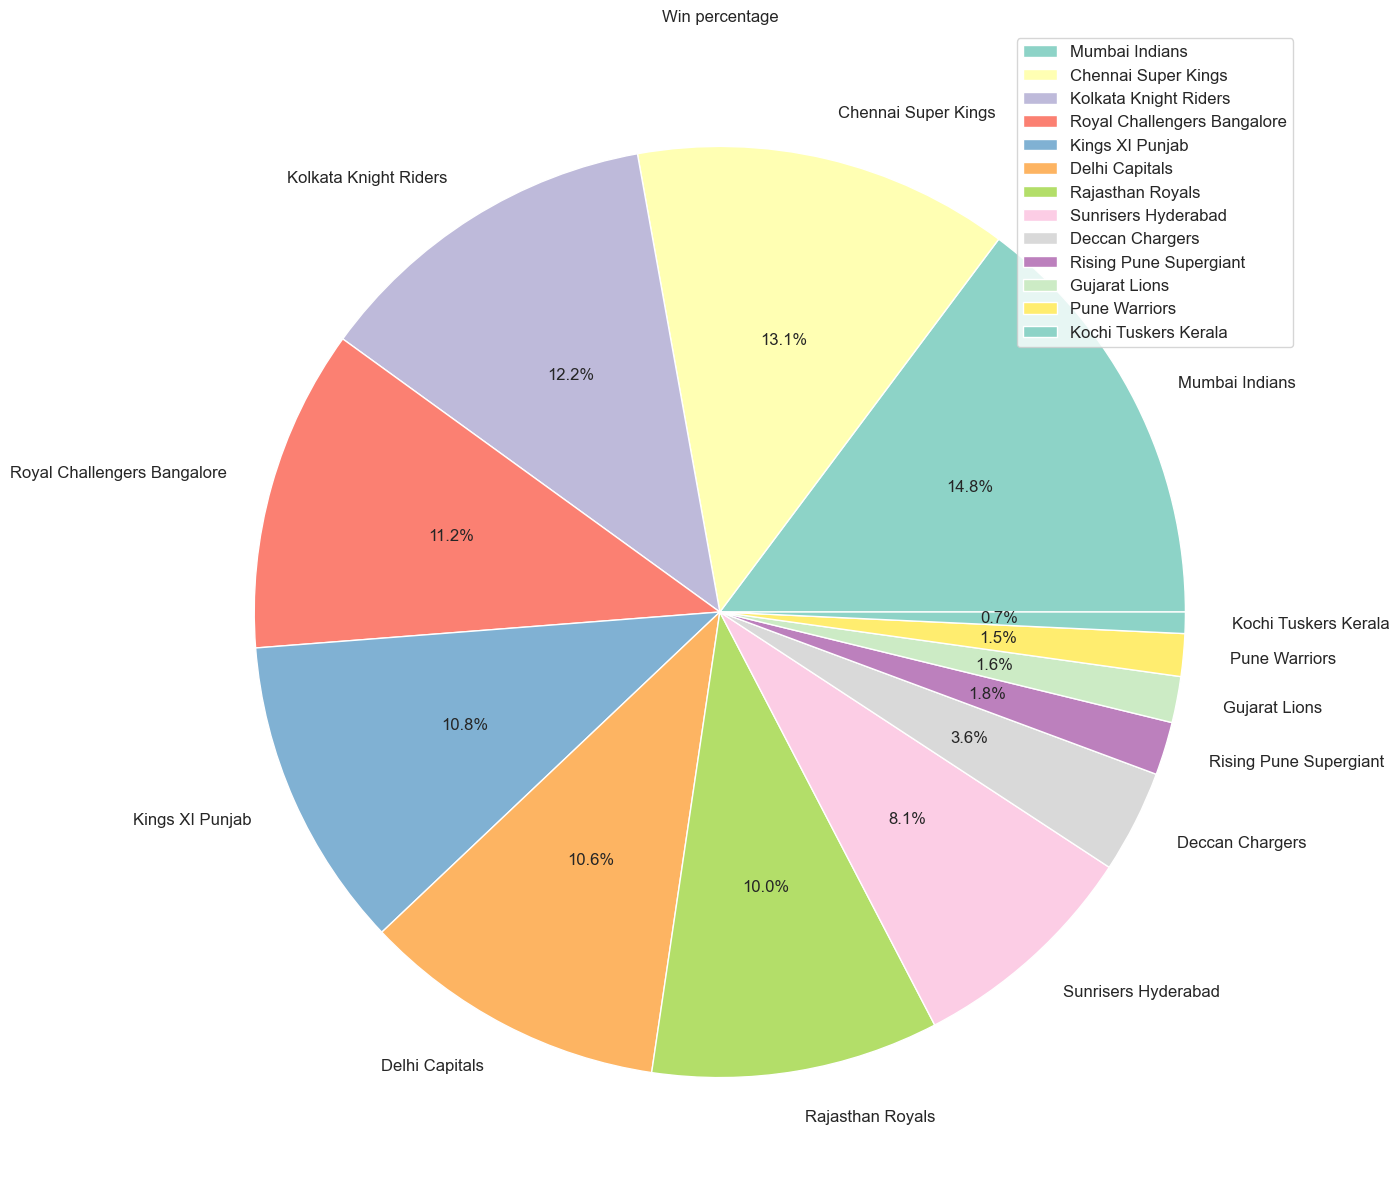

In [66]:
# a pie chart to show the percentage of wins
plt.figure(figsize=(20,12))
sns.set_palette('Set3')
plt.pie(total_match_wins,
       labels=total_match_wins.index,
       autopct='%.1f%%')
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Win percentage',fontsize=12)
plt.show()

> Mumbai Indians has the highest winning percentage followed by chennai Super Kings and Kolkata Knightriders. 

#### Most wins in Eliminator?

In [67]:
# count the number of matches won in eliminator 
matches[matches['eliminator']=='Y'].winner.value_counts()

Kings XI Punjab                3
Rajasthan Royals               2
Royal Challengers Bangalore    2
Mumbai Indians                 2
Delhi Capitals                 2
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Name: winner, dtype: int64

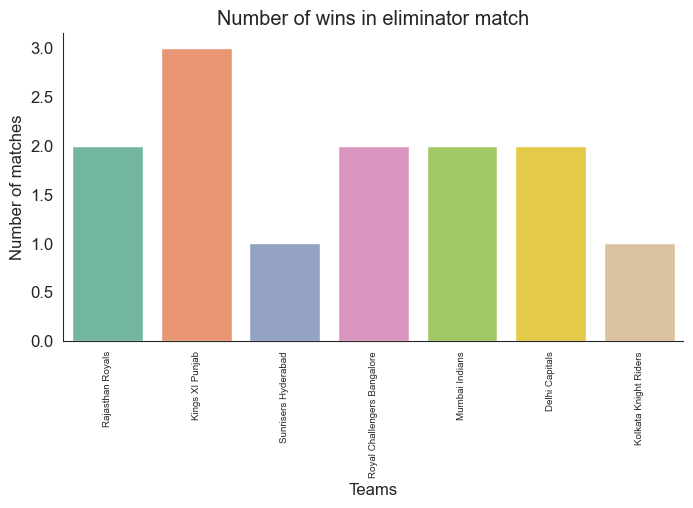

In [68]:
# a countplot to show the number of wins 
plt.figure(figsize=(8,4))
sns.set_palette('Set2')

sns.countplot(x=matches[matches['eliminator']=='Y'].winner)
plt.xticks(rotation=90, fontsize=7)

sns.despine()
plt.title('Number of wins in eliminator match')
plt.ylabel('Number of matches')
plt.xlabel('Teams')
plt.show()

> Kings XI Punjab has the highest number of wins in an eliminator match. RR, RCB, MI and DC has equal number of wins. 

#### Toss Decision

In [69]:
# number of wins of each team after electing to bat first 
toss_bat=matches[matches['toss_decision']=='bat']['toss_winner'].value_counts()

# number of losses after electing to field first 
toss_field=matches[matches['toss_decision']!='bat']['toss_winner'].value_counts()


In [70]:
# create a dataframe 
toss_df= pd.DataFrame({'bat':toss_bat,'field':toss_field})
toss_df.reset_index(inplace=True)

# rename the column name 
toss_df.rename(columns={'index':'team'},inplace=True)

In [71]:
# melt the dataframe 
toss_df_melted= toss_df.melt(id_vars='team',
                      var_name='decision',
                     value_name='count')
toss_df_melted.head()

,team,decision,count
0,Chennai Super Kings,bat,51
1,Deccan Chargers,bat,24
2,Delhi Capitals,bat,35
3,Gujarat Lions,bat,1
4,Kings XI Punjab,bat,27


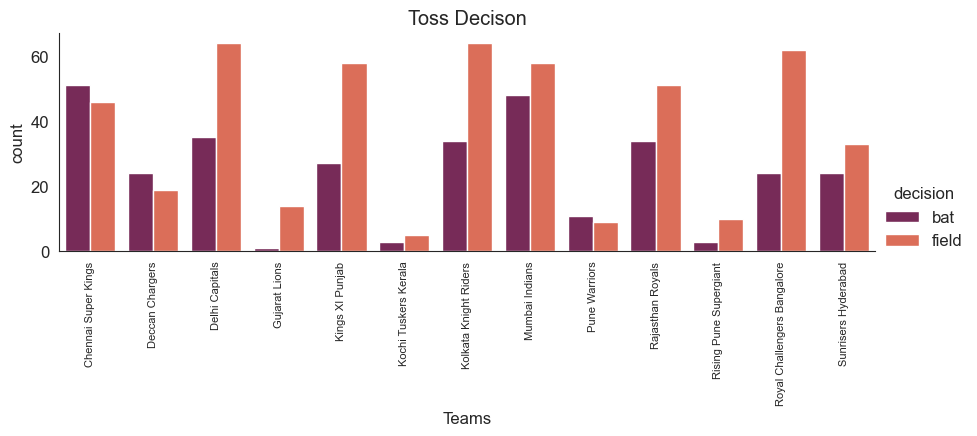

In [72]:
# graph to show the decisions after winning the toss that results in win 
fig=sns.catplot(data=toss_df_melted,
           x='team',
           y='count',
           hue='decision',
           kind='bar',
           palette='rocket',
           height=3,
           aspect=3)
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Teams')
plt.title('Toss Decison')
plt.show()

> Chennai Super Kings and Deccan Chargers are the only team that have won more games while batting first. Most teams have won the games when they choose to field first. 

#### Famous Venue(hosted most no of matches)

In [73]:
# total number of matches played at each venue 
famous_venue=matches['venue'].value_counts().head(8)


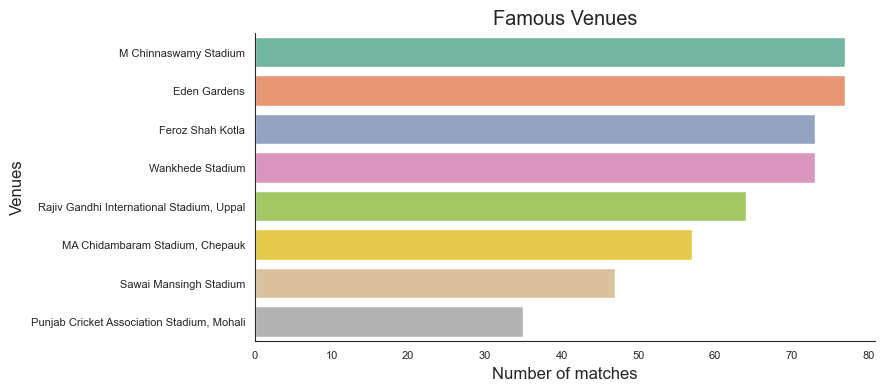

In [74]:
# a barplot to show the number of matches played at famous venues 
plt.figure(figsize=(8,4))
plt.title('Famous Venues')

sns.barplot(x=famous_venue.values,
           y=famous_venue.index)

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
sns.despine()
plt.xlabel('Number of matches')
plt.ylabel('Venues')
plt.show()

#### City that hosted most number of IPL matches

In [75]:
# total number of matches played at each venue 
famous_city=matches['city'].value_counts().head(8)
famous_city

Mumbai        101
Kolkata        77
Delhi          73
Hyderabad      64
Bangalore      63
Chennai        57
Chandigarh     56
Jaipur         47
Name: city, dtype: int64

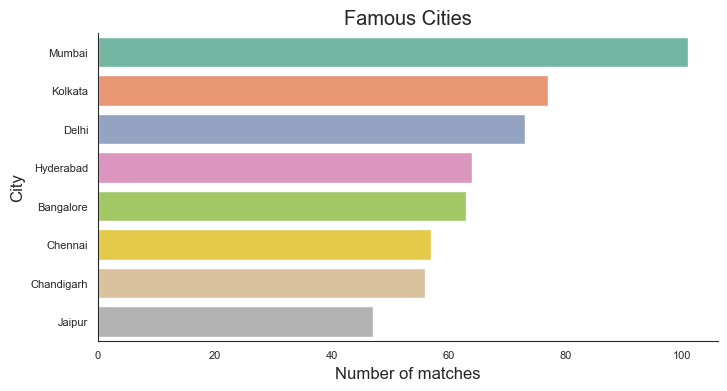

In [76]:
# a barplot to show the number of matches played in cities
plt.figure(figsize=(8,4))
plt.title('Famous Cities')

sns.barplot(x=famous_city.values,
           y=famous_city.index)

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
sns.despine()
plt.xlabel('Number of matches')
plt.ylabel('City')
plt.show()

### How does bat/field first affect the winning in different venues? 

> Probability of winning the match in different venues with respect to batting/ bowling first.

In [77]:
# first 10 venues 
venue_10=list(matches.venue.unique()[:10])

In [78]:
bat_win_per_list=[]
field_win_per_list=[]
for x in venue_10:
    print(x)
    
    # number of wins 
    bat_first= matches[ (matches['venue']==x) & (matches['result']=='runs')].shape[0]
    field_first=matches[(matches['venue']==x) & (matches['result']=='wickets')].shape[0]
    total_matches= bat_first + field_first
    
    bat_first_win_perc= round(bat_first/total_matches * 100,2)
    field_first_win_perc= round(field_first/total_matches*100,2)
    
    bat_win_per_list.append(bat_first_win_perc)
    field_win_per_list.append(field_first_win_perc)
    print('{:.2f}% probablity that if you choose to bat, then you will win the match.'.format(bat_first_win_perc))
    print('{:.2f}% probability that if you choose to field, then you will win the match.'.format(field_first_win_perc))
    print()

M Chinnaswamy Stadium
43.42% probablity that if you choose to bat, then you will win the match.
56.58% probability that if you choose to field, then you will win the match.

Punjab Cricket Association Stadium, Mohali
42.86% probablity that if you choose to bat, then you will win the match.
57.14% probability that if you choose to field, then you will win the match.

Feroz Shah Kotla
48.61% probablity that if you choose to bat, then you will win the match.
51.39% probability that if you choose to field, then you will win the match.

Wankhede Stadium
48.61% probablity that if you choose to bat, then you will win the match.
51.39% probability that if you choose to field, then you will win the match.

Eden Gardens
41.56% probablity that if you choose to bat, then you will win the match.
58.44% probability that if you choose to field, then you will win the match.

Sawai Mansingh Stadium
31.91% probablity that if you choose to bat, then you will win the match.
68.09% probability that if you 

In [79]:
# a dataframe to store the winning percentages
win_perc_df = pd.DataFrame({'bat':bat_win_per_list,'field':field_win_per_list},index=venue_10)
win_perc_df

,bat,field
M Chinnaswamy Stadium,43.42,56.58
"Punjab Cricket Association Stadium, Mohali",42.86,57.14
Feroz Shah Kotla,48.61,51.39
Wankhede Stadium,48.61,51.39
Eden Gardens,41.56,58.44
Sawai Mansingh Stadium,31.91,68.09
"Rajiv Gandhi International Stadium, Uppal",44.44,55.56
"MA Chidambaram Stadium, Chepauk",60.71,39.29
Dr DY Patil Sports Academy,41.18,58.82
Newlands,66.67,33.33


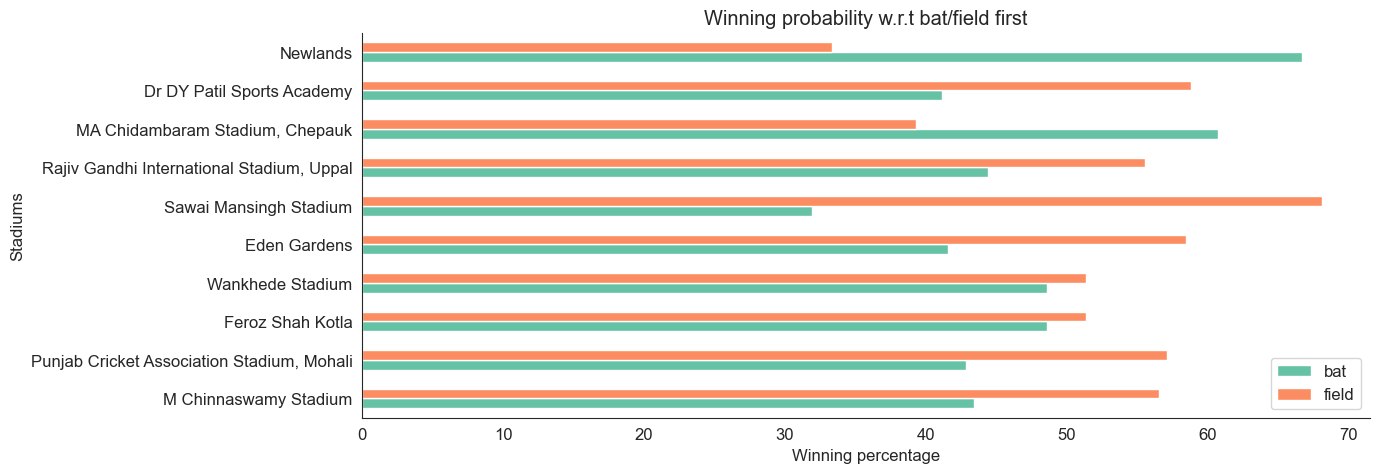

In [80]:
# plot a graph to show the winning percentages 
win_perc_df.plot.barh(figsize=(13,5))
sns.despine()

sns.set_palette('Set3')
plt.title('Winning probability w.r.t bat/field first')
plt.ylabel('Stadiums')
plt.xlabel('Winning percentage')
plt.show()

> Newlands and MA Chidambaram Stadium, Chepauk are the only ones where probability of winning increases with electing to bat first.

In [81]:
# number of times field/bat was chosen 
for x in venue_10:
    print(x)
    # number of matches
    bat_chosen= matches[ (matches['venue']==x) & (matches['toss_decision']=='bat')].shape[0]
    field_chosen=matches[(matches['venue']==x) & (matches['toss_decision']=='field')].shape[0]
    print('bat :', bat_chosen,'field:',field_chosen)

M Chinnaswamy Stadium
bat : 9 field: 68
Punjab Cricket Association Stadium, Mohali
bat : 14 field: 21
Feroz Shah Kotla
bat : 31 field: 42
Wankhede Stadium
bat : 22 field: 51
Eden Gardens
bat : 28 field: 49
Sawai Mansingh Stadium
bat : 19 field: 28
Rajiv Gandhi International Stadium, Uppal
bat : 28 field: 36
MA Chidambaram Stadium, Chepauk
bat : 36 field: 21
Dr DY Patil Sports Academy
bat : 7 field: 10
Newlands
bat : 4 field: 3


### Which are the most and least consistent teams across all seasons?

In [82]:
# change the data type of date to datetime 
matches.date= pd.to_datetime(matches.date)

# create a new column that contains the year
matches['year']= matches['date'].dt.year

In [83]:
# use crosstab()function to create a table 

matches_won_each_season= pd.crosstab(matches['winner'],matches['year'])
matches_won_each_season

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
winner,,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10,6
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0,0
Delhi Capitals,7,10,7,4,11,3,2,5,7,6,5,10,9
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6,7
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11,11
Pune Warriors,0,0,0,4,4,4,0,0,0,0,0,0,0


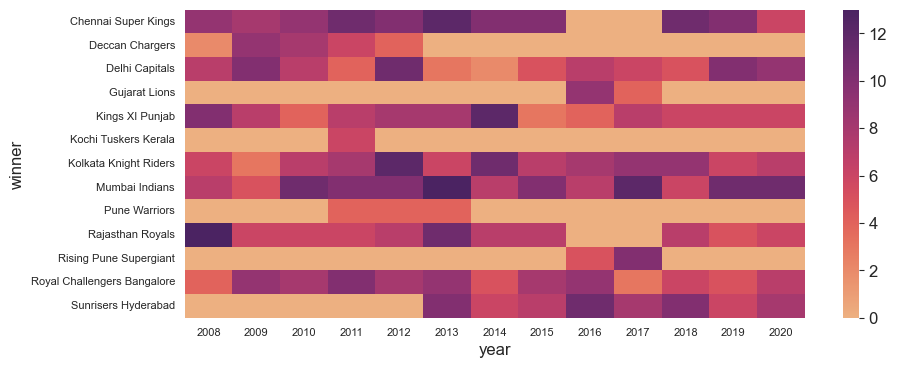

In [84]:
# plot a heatmap 
plt.figure(figsize=(10,4))

sns.heatmap(data=matches_won_each_season,
           #annot=True,
           cmap='flare',
           fmt='d')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

> After looking at the heatmap, CSK seems to be the most consistent team through out IPL. Sunrisers Hyderabad has also been consistent after 2013.
A yellow patch in CSK shows that CSK did not participate in 2016 and 2017.

> Delhi Capitals might be the least consistent team. 

### How do wickets fall in IPL?


In [85]:
deliveries.dismissal_kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [86]:
# a list of dismissal kind 
dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
# a dataframe that contains all the above dismissal kind 
dismiss_df=deliveries[deliveries['dismissal_kind'].isin(dismiss)]

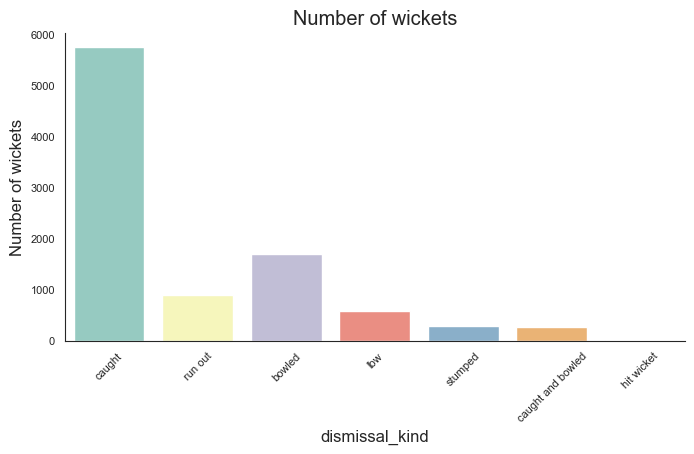

In [87]:
# plot a graph 
plt.figure(figsize=(8,4))
sns.countplot(data=dismiss_df,
           x='dismissal_kind')
plt.xticks(rotation=45,fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.title('Number of wickets')
plt.ylabel('Number of wickets')
plt.show()

> Caught Out is the most common dismissal kind. It also makes sense.

### Counting the number of man of the match awards received by each player.

In [88]:
# top 10 man of match players 
man_of_match=matches['player_of_match'].value_counts().head(10)

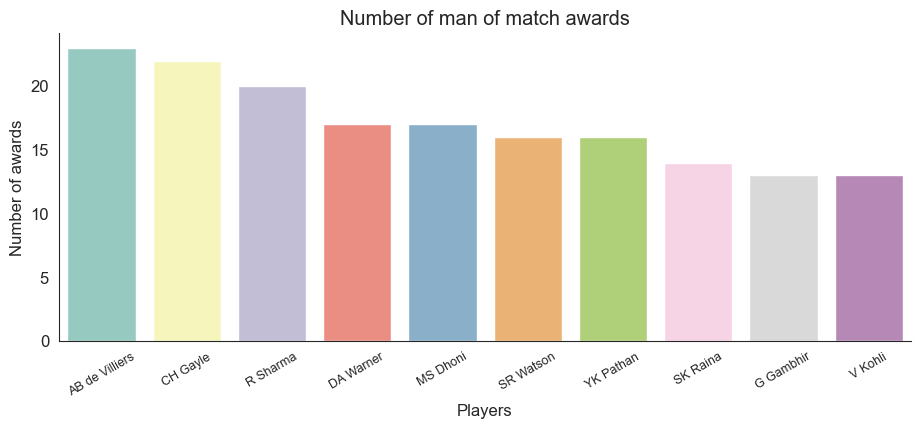

In [89]:
# a barplot to show the players with most man of match award

plt.figure(figsize=(11,4))
sns.barplot(x=man_of_match.index,
           y=man_of_match.values)

sns.set_palette('Set2')
plt.xticks(rotation=30,fontsize=9)
sns.despine()
plt.title('Number of man of match awards')
plt.ylabel('Number of awards')
plt.xlabel('Players')
plt.show()

> AB de Villiers has the highest number of man of match awards followed by CH Gayle and R sharma. 

**Which batsman hit the most number of sixes?**

In [90]:
# count the number of sixes 
batsman_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batsman')[['batsman_runs']].count().nlargest(n=10,columns='batsman_runs').reset_index()
batsman_sixes.head()

,batsman,batsman_runs
0,CH Gayle,349
1,AB de Villiers,235
2,R Sharma,217
3,MS Dhoni,216
4,V Kohli,202


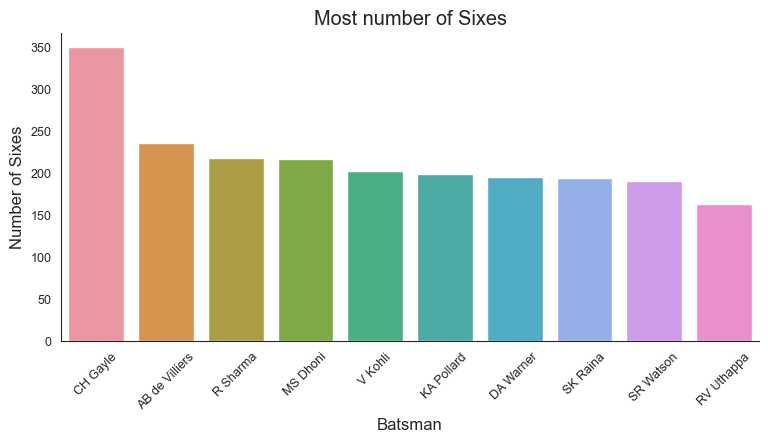

In [91]:
# a bargraph to show the number of sixes 
plt.figure(figsize=(9,4))
sns.barplot(data=batsman_sixes,
           x='batsman',
           y='batsman_runs')
sns.set_palette('Set2')
plt.title('Most number of Sixes')
plt.xlabel('Batsman')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Number of Sixes')
sns.despine()
plt.show()

> CH Gayle and Ab de Villiers have hit most number of sixes.

In [92]:
# count the number of 4s 
batsman_fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batsman')[['batsman_runs']].count().nlargest(n=10,columns='batsman_runs').reset_index()
batsman_fours.head()

,batsman,batsman_runs
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492


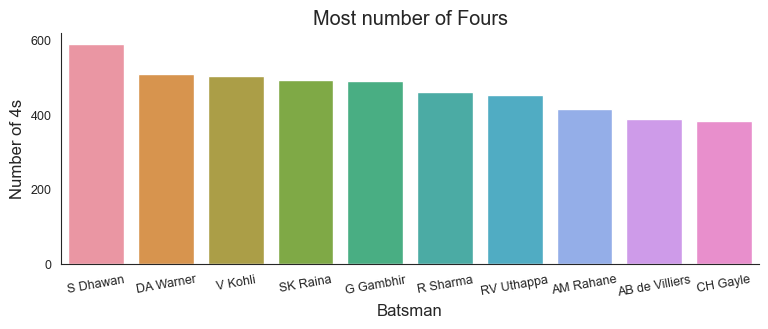

In [145]:
# a bargraph to show the number of sixes 
plt.figure(figsize=(9,3))
sns.barplot(data=batsman_fours,
           x='batsman',
           y='batsman_runs')
sns.set_palette('Set2')
plt.title('Most number of Fours')
plt.xlabel('Batsman')
plt.xticks(rotation=10,fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Number of 4s')
sns.despine()
plt.show()

> *Shikhar Dhavan hit the most number of 4s.*

**Which bowler gave the most number of 6s?**

In [94]:
# number of sixes conceded by bowlers 
bowler_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('bowler')[['batsman_runs']].count().nlargest(n=10,columns='batsman_runs').reset_index()

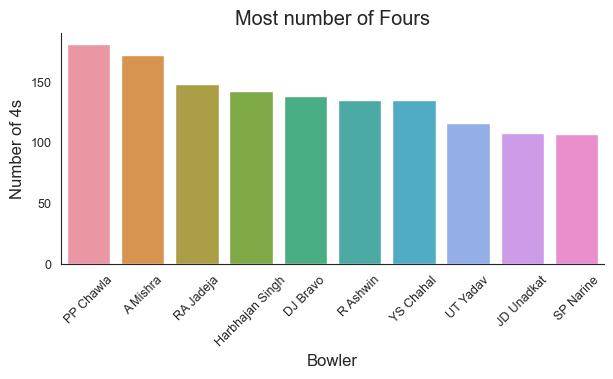

In [149]:
# a bargraph to show the number of sixes 
plt.figure(figsize=(7,3))
sns.barplot(data=bowler_sixes,
           x='bowler',
           y='batsman_runs')
sns.set_palette('Set2')
plt.title('Most number of Fours')
plt.xlabel('Bowler')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Number of 4s')
sns.despine()
plt.show()

> *Batsmen hit most number of 6s against PP Chawla*

**Which bowler gave the most number of 4s?**

In [98]:
bowler_4s = deliveries[deliveries['batsman_runs'] == 4].groupby('bowler')[['batsman_runs']].count().nlargest(n=10,columns='batsman_runs').reset_index()

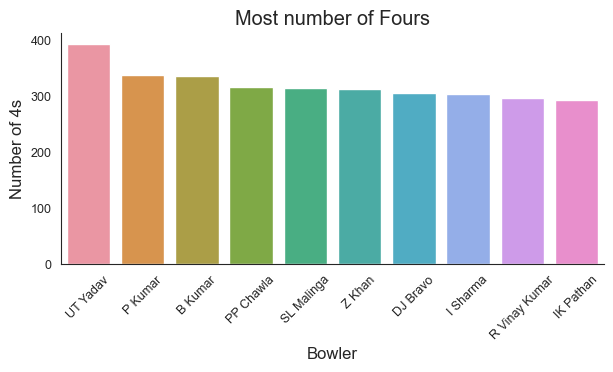

In [150]:
# a bargraph to show the number of sixes 
plt.figure(figsize=(7,3))
sns.barplot(data=bowler_4s,
           x='bowler',
           y='batsman_runs')
sns.set_palette('Set2')
plt.title('Most number of Fours')
plt.xlabel('Bowler')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Number of 4s')
sns.despine()
plt.show()

> *Batsmen hit most number of 4s against UT Yadav*

### We have always wondered whether the teams batting in Inning1 has more advantage over their rival teams.<br> 

**Which teams are more likely to win ?** 

In [259]:
matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008


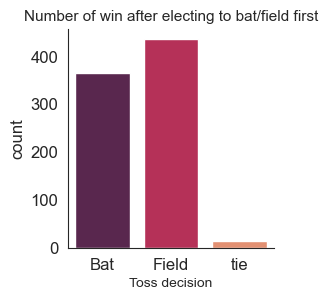

In [285]:
# use catplot() to plot a count of matches 
# use the result column 
sns.catplot(x='result',
           kind='count',
           data=matches,
            aspect=1,
            height=3,
            palette='rocket'
           )
plt.title('Number of win after electing to bat/field first',fontsize=11)
plt.xlabel('Toss decision',fontsize=10)
plt.xticks([0, 1,2], ['Bat', 'Field','tie'])
plt.show()

>*We can see that the teams playing in the second innings have a slightly better chance at winning. So getting to bat first may not always be the correct alernative.*

### Checking stats of the Player

A function is create to display the stats of dismissal kind of players. 

In [299]:
"""
The function accepts a parameter and prints a pie chart that displayes the 
percentages of dismissal kind. 

argument: 
player :string
Name of the player 
"""
def dismiss_analyse(player):
    # get the df of player
    df_player=deliveries[deliveries['batsman']==player]
    # the number of dismissals of each type 
    dismiss_kind= df_player['dismissal_kind'].value_counts()
    
    # plot the pie chart 
    plt.pie(dismiss_kind,
       autopct= '%1.1f%%',
        rotatelabels=True,
        labels= dismiss_kind.index
       )
    plt.show()
    

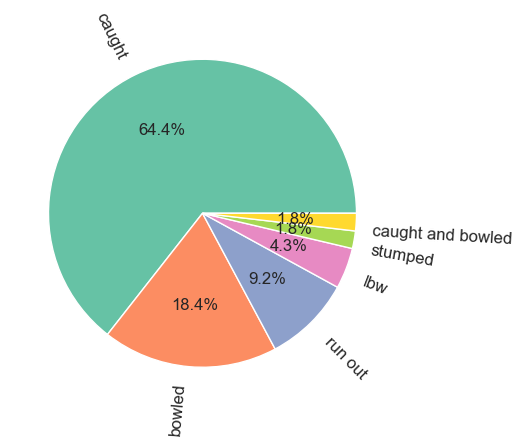

In [300]:
# dismissal stats of V Kohli
dismiss_analyse('V Kohli')

> Virat Kohli has been caught out 64.5% of the time. It would be wise to set the field accordingly. 

### Let's move on to some **Player Statistics**.





Let's count the Centuries scored by each batsmen in each match. Also, we would like to have other information on our batsmen say, Strike rate, total runs scored and balls faced.

In [152]:
# runs scored by each player in each match
runs = deliveries.groupby(by =['batsman', 'id']).agg({'batsman_runs':'sum'})
runs

batsman_runs
batsman        id                   
A Ashish Reddy 548346             10
               548352              3
               548359              8
               548373             10
               548376              4
...                              ...
Z Khan         980903              4
               980993              2
               1082595             1
               1082635             2
               1082646             1

[12155 rows x 1 columns]

In [188]:
# add a new column to show if it was a century or not 
runs['is_century']=runs['batsman_runs']//100

In [197]:
# group by the first index value i.e level=0

# find the sum (total number of centuries)
centuries=runs.groupby(level=0)['is_century'].sum()

In [205]:
# total runs scored by batsman throughout the IPL 
batsman_total_runs= runs.groupby(level=0)['batsman_runs'].sum().sort_values(ascending=False)
batsman_total_runs.head(10)

batsman
V Kohli           5878
SK Raina          5368
R Sharma          5296
DA Warner         5254
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64

In order to calculate the number of balls faced, there are following things to remember.

Wides and noballs are not counted in batsman's record . So in order to account for that we are not considering wides, byes, penalty.

In [206]:
# number of balls faced
balls_faced= deliveries[~(deliveries['extras_type'].isin(['wides', 'noballs', 'penalty']))]

In [227]:
# number of balls faced 
batsman_stats = balls_faced.groupby(['batsman']).agg({'ball': 'count'})

In [228]:
# add columns to batsman_stats 
batsman_stats['runs']=batsman_total_runs
batsman_stats['strike_rate']=round( batsman_stats['runs']/batsman_stats['ball']*100,0)
batsman_stats['centuries']=centuries

In [230]:
# a dataframe to show the 
batsman_stats.reset_index(inplace=True)
batsman_stats

,batsman,ball,runs,strike_rate,centuries
0,A Ashish Reddy,193,280,145.0,0
1,A Chandila,7,4,57.0,0
2,A Chopra,71,53,75.0,0
3,A Choudhary,20,25,125.0,0
4,A Dananjaya,5,4,80.0,0
...,...,...,...,...,...
531,YV Takawale,177,192,108.0,0
532,Yashpal Singh,65,47,72.0,0
533,Younis Khan,7,3,43.0,0
534,Yuvraj Singh,2113,2750,130.0,0


**Which player scored the most number of centuries?**

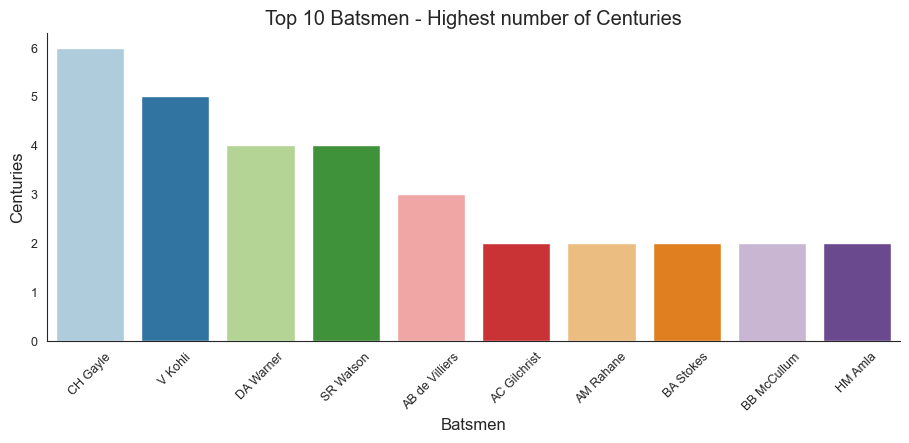

In [235]:
# top 10 players with most centuries
top10_centuries = batsman_stats.nlargest(n = 10, columns = 'centuries')

# plot a barplot to show the number of centuries 
plt.figure(figsize=(11,4))
sns.barplot(x = 'batsman',
            y ='centuries',
            data=top10_centuries,
            palette='Paired' )

sns.despine()
plt.title('Top 10 Batsmen - Highest number of Centuries')
plt.ylabel('Centuries')
plt.xlabel('Batsmen')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.show()

> Chris Gayle scored 6 centuries till 2020 which is the highest of all. 

**Which batsman has the highest runs?**

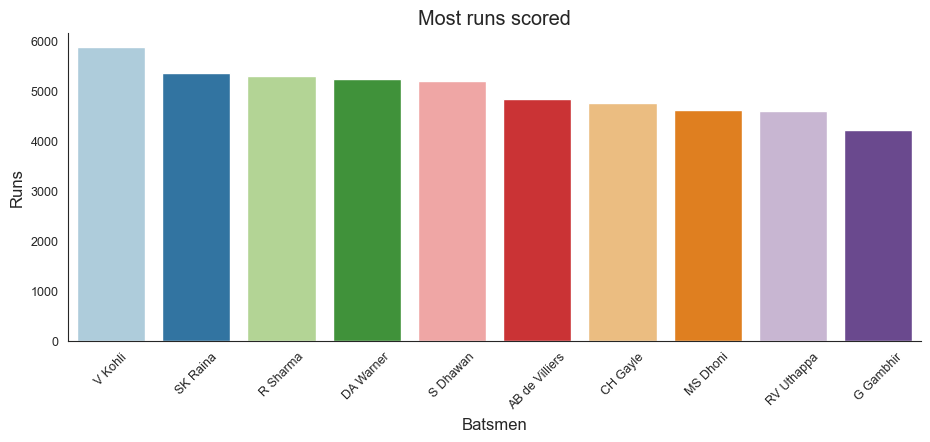

In [237]:
# top 10 players with most runs 
top10_runs = batsman_stats.nlargest(n = 10, columns = 'runs')

# plot a barplot to show the number of centuries 
plt.figure(figsize=(11,4))
sns.barplot(x = 'batsman',
            y ='runs',
            data=top10_runs,
            palette='Paired' )

sns.despine()
plt.title('Most runs scored')
plt.ylabel('Runs')
plt.xlabel('Batsmen')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.show()

> Virat Kohli scored the highest number of runs throuhout the IPL. 

> 7 out of 10 top players are native indian. 

 **Which player has the highest strike rate?**

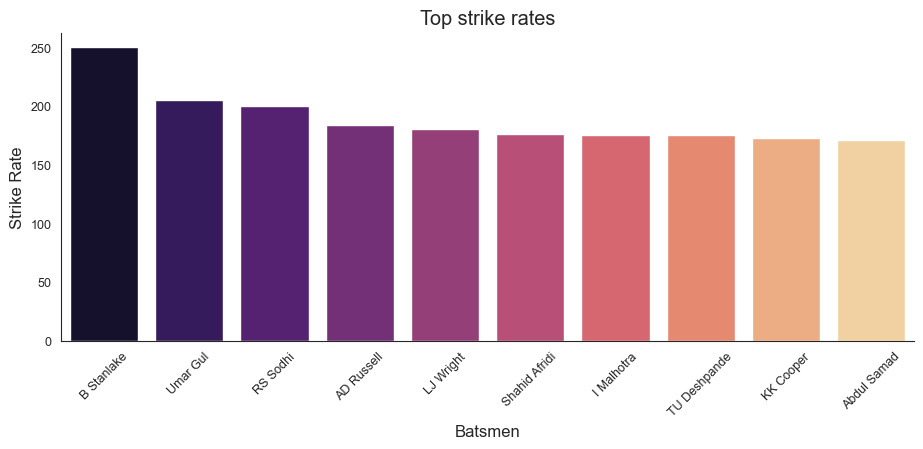

In [239]:
# top 10 players with most runs 
top10_srate = batsman_stats.nlargest(n = 10, columns = 'strike_rate')

# plot a barplot to show the number of centuries 
plt.figure(figsize=(11,4))
sns.barplot(x = 'batsman',
            y ='strike_rate',
            data=top10_srate,
            palette='magma' )

sns.despine()
plt.title('Top strike rates')
plt.ylabel('Strike Rate')
plt.xlabel('Batsmen')
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9)
plt.show()

> *B Stanlake has the highest Strike rate.*

Similarly, we would also like to have some statistics on our bowlers as well, for e.g. total wickets, Maidens, Strike rate (balls / wicket), Bowling Average (Total runs / wickets).<br><br>
**Data Preparation.**

In [240]:
run_per_over = deliveries.groupby(by =['bowler', 'id', 'over']).agg({'total_runs':'sum'})
run_per_over

total_runs
bowler         id      over            
A Ashish Reddy 548329  5             20
                       12             9
               548341  11             7
                       13             3
                       15            10
...                                 ...
Z Khan         1082642 14             6
               1082646 0             10
                       2              2
                       14             6
                       16            14

[31390 rows x 1 columns]

In [243]:
# check for maiden over 
run_per_over['is_maiden']=run_per_over['total_runs'].apply(lambda x: x == 0)

In [244]:
# calculate total number of maidens 
maidens = run_per_over.groupby(level=0)['is_maiden'].sum()

In [248]:
# create bowler statistics table 

bowler_stats = deliveries.groupby('bowler').agg({'total_runs':'sum', 'ball': 'count', 'is_wicket':'sum'})

bowler_stats['Strike_rate'] = np.divide(bowler_stats['ball'], bowler_stats['is_wicket'])
bowler_stats['BowlingAve'] = np.divide(bowler_stats['total_runs'], bowler_stats['is_wicket'])
bowler_stats['Maidens'] = maidens
bowler_stats.reset_index(inplace=True)
bowler_stats.head()

,bowler,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
0,A Ashish Reddy,400,270,19,14.210526,21.052632,0
1,A Chandila,245,234,11,21.272727,22.272727,0
2,A Choudhary,144,108,5,21.600000,28.800000,2
3,A Dananjaya,47,25,0,inf,inf,0
4,A Flintoff,106,66,2,33.000000,53.000000,0


**Which bowler took the most wickets?**

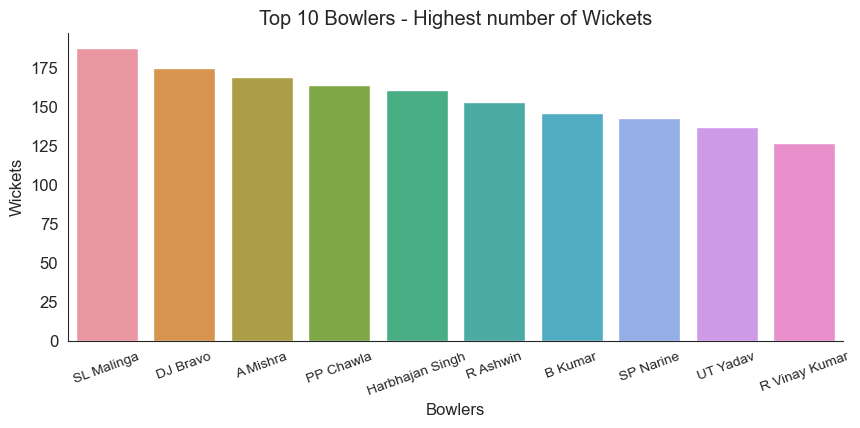

In [253]:
# bowlers with most wickets 
top10_wickets = bowler_stats.nlargest(n = 10, columns = 'is_wicket')

plt.figure(figsize=(10,4))
# a barplot to show the top 10 bowlers 
sns.barplot(x = 'bowler',
            y ='is_wicket',
            data=top10_wickets
                      )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Wickets')
plt.ylabel('Wickets')
plt.xlabel('Bowlers')
plt.xticks(rotation = 20,fontsize=10)
plt.show()

> SL Malinga took the most number of wickets followed by DJ Bravo and A Mishra. 
 There are 5 spinners and 5 fast bowlers with most wickets. The top 5 position is dominated by spinners.

**Which bowler delivered the most number of Maidens?**

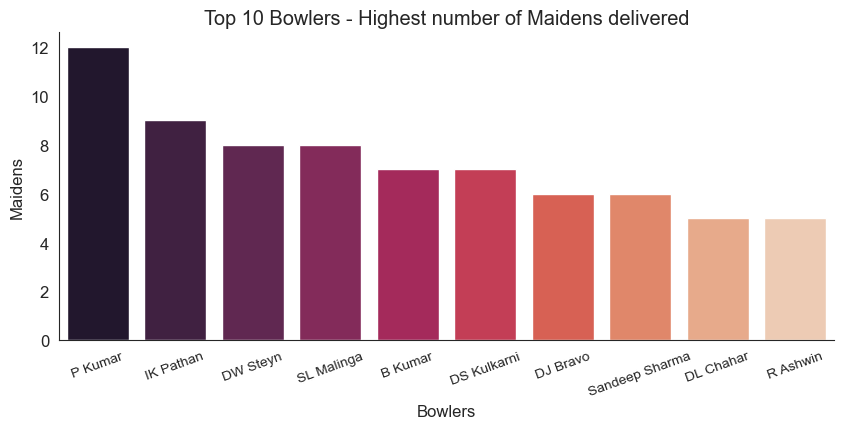

In [257]:
# top 10 maidens 
top10_maidens = bowler_stats.nlargest(n = 10, columns = 'Maidens')

plt.figure(figsize=(10,4))

# a barplot to show the top 10 bowlers with most maidens 
sns.barplot(x = 'bowler',
            y ='Maidens',
            data=top10_maidens,
            palette='rocket'
                      )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Maidens delivered')
plt.ylabel('Maidens')
plt.xlabel('Bowlers')
plt.xticks(rotation = 20,fontsize=10)
plt.show()

> *P Kumar delivered the most number of maiden.*

### THANK YOU